In [1]:
# MACHINE LEARNING MODELS SENSITIVE TO OUTLIERS:
# 1.NAIVE BAYES CLASSIFIER---------------->NOT SENSITIVE TO OUTLIERS
# 2.SVM----------------------------------->NOT SENSITIVE TO OUTLIERS
# 3.LINEAR REGRESSION--------------------->SENSITIVE TO OUTLIERS
# 4.LOGISTIC REGRESSION------------------->SENSITIVE TO OUTLIERS
# 5.DECISION TREE CLASSIFIER OR REGRESSOR->NOT SENSITIVE TO OUTLIERS
# 6.ENSEMBLE (XG BOOST,GB,RF)------------->NOT SENSITIVE TO OUTLIERS
# 7.KNN----------------------------------->NOT SENSITIVE TO OUTLIERS
# 8.KMEANS-------------------------------->SENSITIVE TO OUTLIERS
# 9.HIERARICHAL--------------------------->SENSITIVE TO OUTLIERS
# 10.PCA---------------------------------->SENSITIVE TO OUTLIERS
# 11.NEURAL NETWORKS---------------------->SENSITIVE TO OUTLIERS

In [2]:
# OUTLIERS CAN BE CALCULATED BY:
# 1.IQR(INTER QUARTILE RANGE)
# 2.Z-SCORE(NORMAL DISTRIBUTION(MEAN,STD.DEVATION)------------> STANDARD NORMAL DISTRBUTION(MEAN=0,STD.DEVAIATION=1))

In [3]:
# WHEN DATA IS SKEWED TAKE IQR AS REFERENCE
# WHEN DATA HAS OUTLIERS TAKE Z-SCORE

In [4]:
# DETECT OUTLIER BY:
# 1.DATA POINT THAT FALLS OUTSIDE OF 1.5 OF INTERQUARTILE RANGE ABOVE 3RD QUARTILE AND BELOW 1ST QUARTILE
# 2.DATA POINT THAT FALLS OUTSIDE OF 3RD STANDARD DEVIATION,WE CAN USE Z-SCORE,IF Z-SCORE FALLS OUTSIDE OF 2ND STANDARD DEVIATION 
# AVOVE THIS NEGLECT

In [5]:
# 0 QUARTILE <------> 0 QUANTILE <-----> 0 PERCENTILE
# 1 QUARTILE <------> 0.25 QUANTILE <-----> 25 PERCENTILE (25 PERCENTAGE OF VALUES AT THAT PARTICULAR DISTRIBUTION ARE LESS THAN THE VALUE AT 25 PERCENTILE)
# 2 QUARTILE <------> 0.50 QUANTILE <-----> 50 PERCENTILE (MEDIAN)
# 3 QUARTILE <------> 0.75 QUANTILE <-----> 75 PERCENTILE (75 PERCENTAGE OF VALUES AT THAT PARTICULAR DISTRIBUTION ARE LESS THAN THE VALUE AT 75 PERCENTILE)
# 4 QUARTILE <------> 1 QUANTILE <-----> 100 PERCENTILE

In [6]:
import pandas as pd

In [7]:
Data=pd.read_csv('Titanic.csv')

In [8]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
Data['Age'].isnull().sum()

177

In [10]:
import seaborn as sns
sns.set_style('darkgrid')

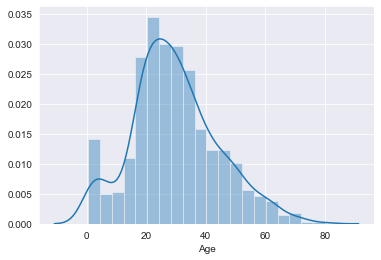

In [11]:
sns.distplot(Data['Age'].dropna())

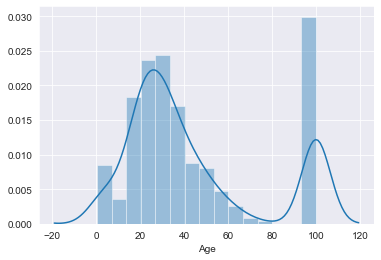

In [12]:
sns.distplot(Data['Age'].fillna(100))

In [13]:
# NORMAL DISTRIBUTION: ESTIMATE OUTLIER TECHNIQUE(EXTREME VALUE ANALYSIS)

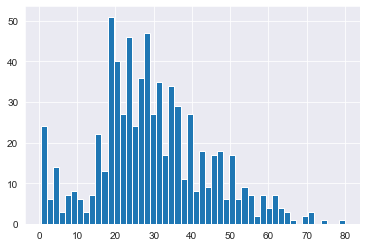

In [14]:
Data['Age'].hist(bins=50)

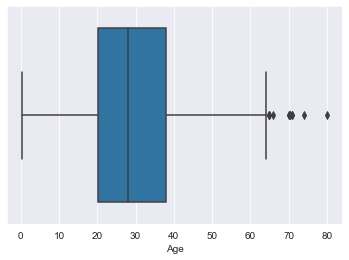

In [15]:
sns.boxplot(Data['Age'])

In [16]:
Data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
# ASSUMING AGE FOLLOWS GAUSSIAN DISTRIBUTION
Upper_Boundary=Data['Age'].mean() + 3*Data['Age'].std()
Lower_Boundary=Data['Age'].mean() - 3*Data['Age'].std()

In [18]:
Lower_Boundary,Data['Age'].mean(),Upper_Boundary

(-13.88037434994331, 29.69911764705882, 73.27860964406095)

In [19]:
# COMPUTE INTERQUANTILE RANGE
IQR=Data['Age'].quantile(0.75) - Data['Age'].quantile(0.25)
IQR

17.875

In [20]:
# WHEN DATA IS NORMALLY DISTRIBUTED----->WHEN DATA HAS OUTLIERS TAKE 1.5 AND WHEN DATA IS SKEWED TAKE 3 (EXTREME OUTLIER)
Lower_Bridge=Data['Age'].quantile(0.25)-(IQR*1.5)
Upper_Bridge=Data['Age'].quantile(0.75)+(IQR*1.5)

In [21]:
Lower_Bridge,Upper_Bridge

(-6.6875, 64.8125)

In [22]:
# EXTREME OUTLIER
Lower_Bridge=Data['Age'].quantile(0.25)-(IQR*3)
Upper_Bridge=Data['Age'].quantile(0.75)+(IQR*3)

In [23]:
Lower_Bridge,Upper_Bridge

(-33.5, 91.625)

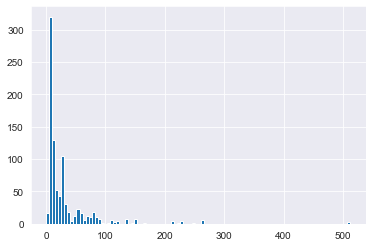

In [24]:
Data['Fare'].hist(bins=100)

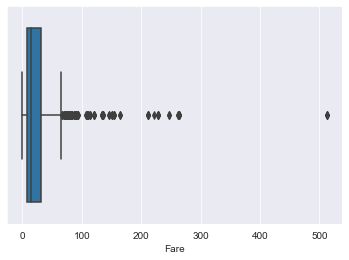

In [25]:
sns.boxplot(Data['Fare'])

In [26]:
Data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [27]:
IQR=Data['Age'].quantile(0.75) - Data['Fare'].quantile(0.25)
Lower_Bridge=Data['Fare'].quantile(0.25)-(IQR*1.5)
Upper_Bridge=Data['Fare'].quantile(0.75)+(IQR*1.5)

In [28]:
Lower_Bridge,IQR,Upper_Bridge

(-37.224, 30.0896, 76.1344)

In [29]:
Lower_Bridge=Data['Fare'].quantile(0.25)-(IQR*3)
Upper_Bridge=Data['Fare'].quantile(0.75)+(IQR*3)

In [30]:
Lower_Bridge,IQR,Upper_Bridge

(-82.3584, 30.0896, 121.2688)

In [31]:
Data1=Data.copy()

In [32]:
Data1.loc[Data1['Age']>=73,'Age']=73

In [33]:
Data1.loc[Data['Fare']>=100,'Fare']=100

In [34]:
Data1['Fare'].median(),Data['Fare'].median()

(14.4542, 14.4542)

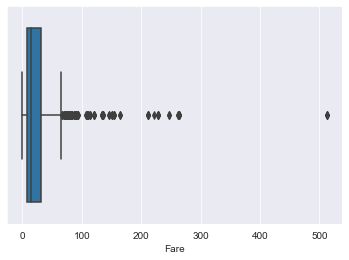

In [35]:
sns.boxplot(Data['Fare'])

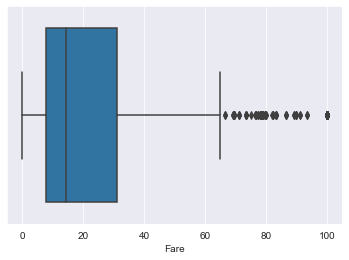

In [36]:
sns.boxplot(Data1['Fare'])

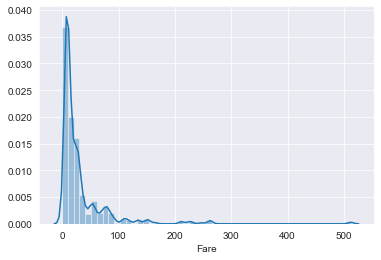

In [37]:
sns.distplot(Data['Fare'])

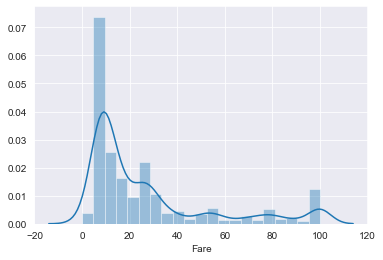

In [38]:
sns.distplot(Data1['Fare'])

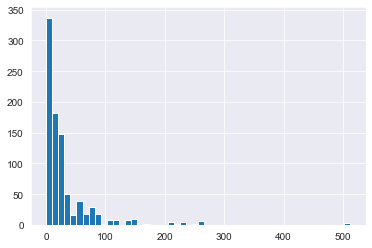

In [39]:
Data['Fare'].hist(bins=50)

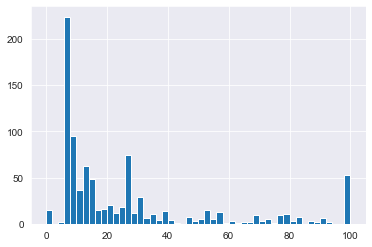

In [40]:
Data1['Fare'].hist(bins=50)

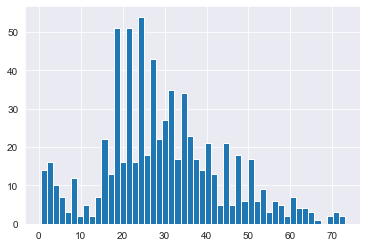

In [41]:
Data1['Age'].hist(bins=50)

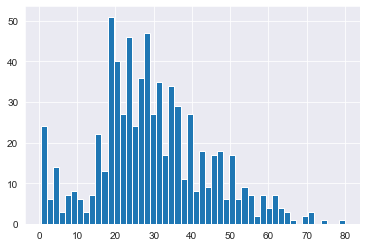

In [42]:
Data['Age'].hist(bins=50)

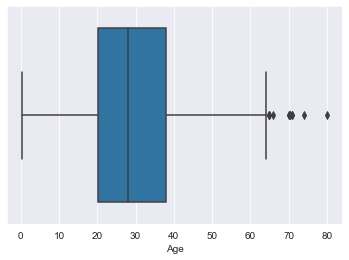

In [43]:
sns.boxplot(Data['Age'])

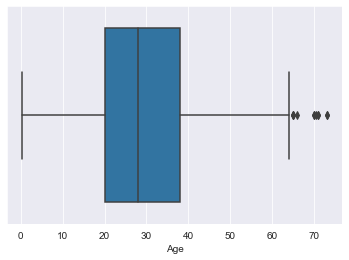

In [44]:
sns.boxplot(Data1['Age'])